In [1]:
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("Mall_Customers.csv")


In [3]:
print(df.shape)
print (df.head())


(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
print (df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
print ( df.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


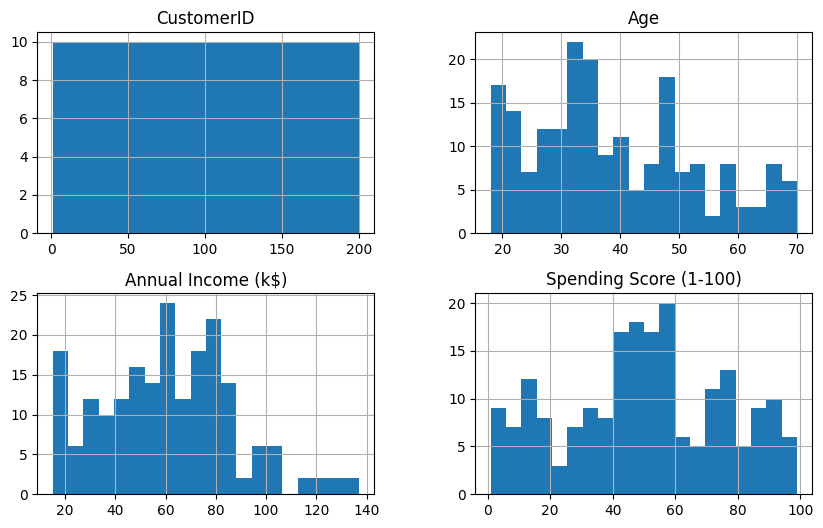

In [6]:
#distribution des variables
df.hist(bins=20 ,  figsize=(10,6))
plt.show() 


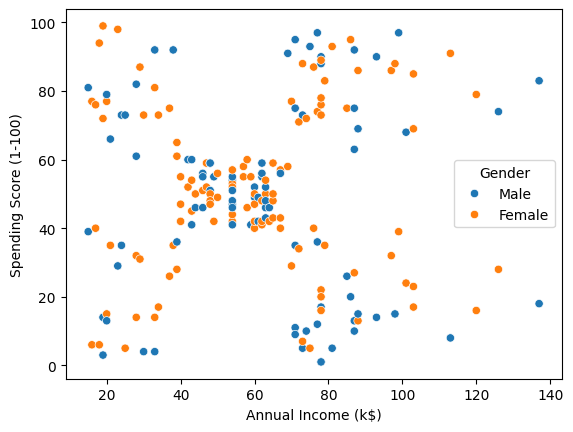

In [7]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="Gender")
plt.show()


##DATA QUALITY

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop(columns=['CustomerID'])


In [11]:
print(df.describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


<Axes: xlabel='Annual Income (k$)'>

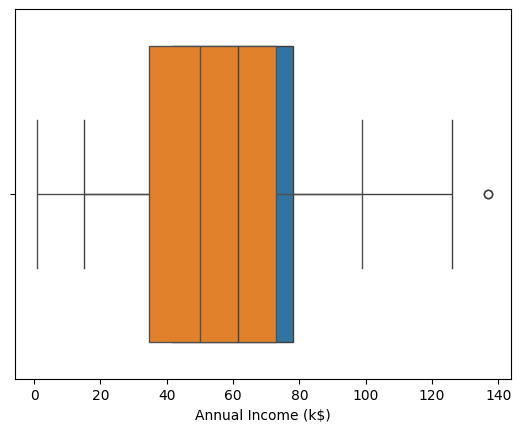

In [12]:
df.describe()
sns.boxplot(x=df["Annual Income (k$)"])
sns.boxplot(x=df["Spending Score (1-100)"])

<Axes: xlabel='Spending Score (1-100)'>

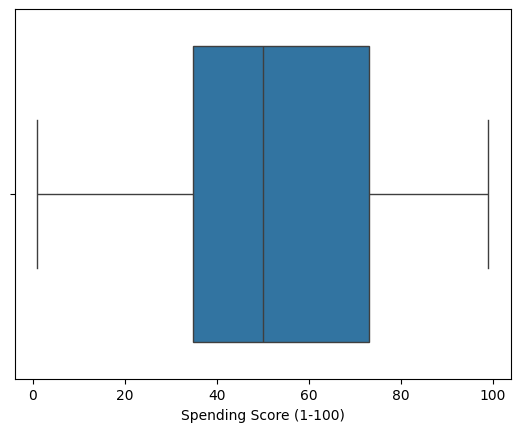

In [13]:
sns.boxplot(x=df["Spending Score (1-100)"])

In [14]:
df.dtypes



Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
# 3. Scaling des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import joblib


In [16]:
# 4. Choix du nombre de clusters (ex: 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

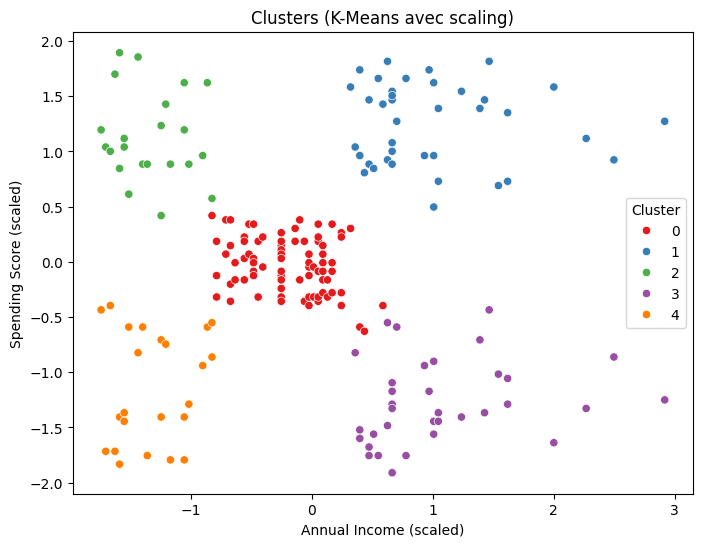

In [17]:
#5. Visualisation des clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=df["Cluster"], palette="Set1"
)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Clusters (K-Means avec scaling)")
plt.show()

In [18]:
cluster_profile = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_profile)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [19]:
# Tableau croisé : % hommes/femmes par cluster
genre_dist = pd.crosstab(df["Cluster"], df["Gender"], normalize="index") * 100
print(genre_dist)


Gender      Female       Male
Cluster                      
0        59.259259  40.740741
1        53.846154  46.153846
2        59.090909  40.909091
3        45.714286  54.285714
4        60.869565  39.130435


Cluster
0    42.716049
1    32.692308
2    25.272727
3    41.114286
4    45.217391
Name: Age, dtype: float64


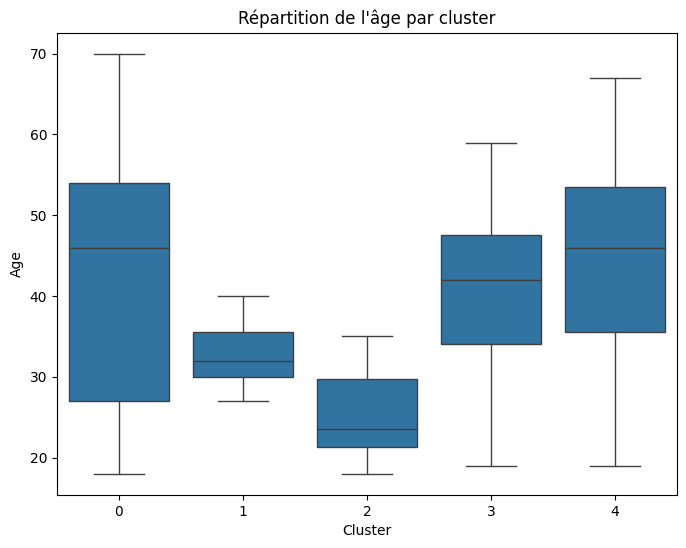

In [20]:

# Moyenne d'âge par cluster
age_mean = df.groupby("Cluster")["Age"].mean()
print(age_mean)

# Boxplot de l'âge dans chaque cluster
plt.figure(figsize=(8,6))
sns.boxplot(x="Cluster", y="Age", data=df)
plt.title("Répartition de l'âge par cluster")
plt.show()


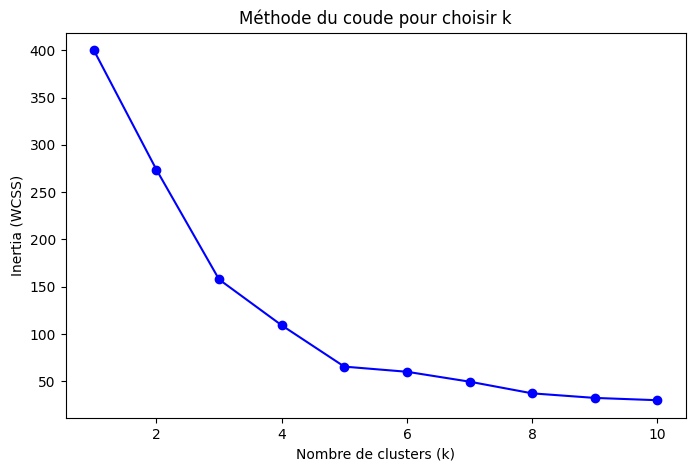

In [21]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Méthode du coude pour choisir k")
plt.show()

# ###  K optimal = 5 dapres la methode du coude  : passant a DBSCAN
 

In [23]:
from sklearn.metrics import silhouette_score




In [25]:
from sklearn.cluster import DBSCAN

# DBSCAN sur les données scaled
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = labels_db

print(df["DBSCAN_Cluster"].value_counts())


DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


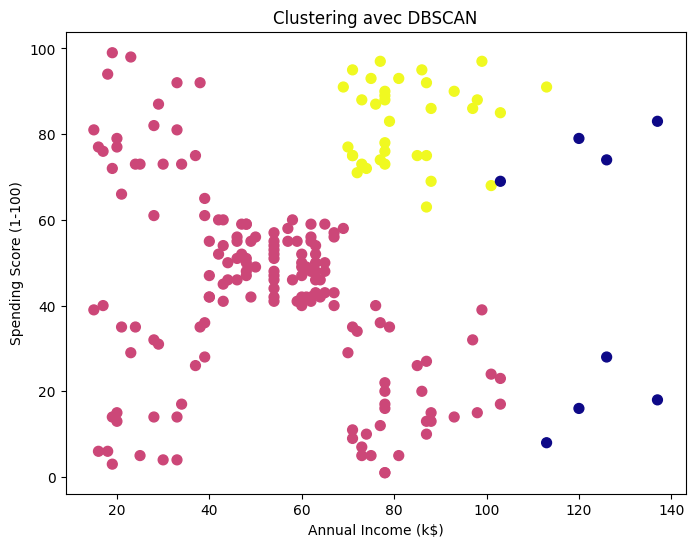

In [26]:
# Visualisation des clusters DBSCAN

plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], 
            c=df["DBSCAN_Cluster"], cmap="plasma", s=50)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering avec DBSCAN")
plt.show()


In [27]:
# Supposons que df contient les colonnes 'Spending Score (1-100)' et 'DBSCAN_Cluster'
average_spending = df.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
print(average_spending)


DBSCAN_Cluster
-1    46.875000
 0    43.101911
 1    82.800000
Name: Spending Score (1-100), dtype: float64


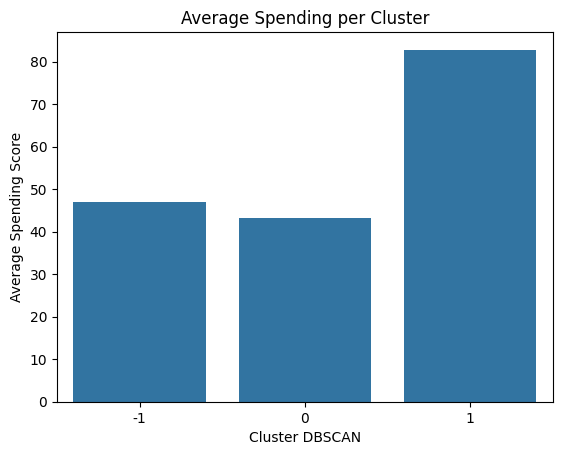

In [28]:
sns.barplot(x=average_spending.index, y=average_spending.values)
plt.xlabel("Cluster DBSCAN")
plt.ylabel("Average Spending Score")
plt.title("Average Spending per Cluster")
plt.show()

In [29]:


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.2f}")


k=2, Silhouette Score=0.40
k=3, Silhouette Score=0.47
k=4, Silhouette Score=0.49
k=5, Silhouette Score=0.55
k=6, Silhouette Score=0.51
k=7, Silhouette Score=0.50
k=8, Silhouette Score=0.46
k=9, Silhouette Score=0.46


In [30]:
import joblib

# entraîner ton modèle
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# sauvegarder le modèle
joblib.dump(kmeans, "kmeans_model.pkl")



['kmeans_model.pkl']

In [31]:
kmeans_loaded = joblib.load("kmeans_model.pkl")

# faire une prédiction
prediction = kmeans_loaded.predict(X_scaled)
print(prediction[:10])

[4 2 4 2 4 2 4 2 4 2]


In [33]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']